Carlos Yair Ruiz Tejeda

Matricula 180300311

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from random import randint
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox

# Clasificación de dígitos manuscritos con PCA

Esta practica fue elavoradoa para mostrar la efectividad de la clasificacion para distingir imagnenes de manusncritos de los digitos 1 y 9, de esta forma proyectarlas a espacios de menor dimencionalidad por medio de la tacnica PCA.

## PCA 

Analisis de componentes principales, es una tenica para reducir la dimencionalidad de los datos, manteniendo la mejor calidad e informacion posible, esta tencnica busca identificar las direcciones de los datos donde los datos varian mucho y proyectar esas direcciones creando nuevas variables o componente principales.
los componentes princiaples se ordenan de forma decendente en la importancia de cantidad de la variabilidad que muestran los datos originales.

## Lectura de los datos manuscritos

El conjunto de datos a desarrrollar proviene de la libreria de sklearn donde contienen los datos de imagenes de manuscritos sobre numeros los cuales solo se seleccionaran los numeros 1 y 9 del data set para ser visualizados y tratados por medio de PCA.

In [237]:
# Carga los datos y separa las características y las etiquetas
[digits,labs] = load_digits(return_X_y=True)
[N,d] = digits.shape # número de datos y dimensionalidad
print(N) #número de observaciones
print(d) #dimensionalidad

1797
64


In [238]:
print(digits[0,:].shape)
digits[0,]

(64,)


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

2
[[ 0.  0.  7. 16. 14.  3.  0.  0.]
 [ 0.  0.  9. 14. 11. 15.  0.  0.]
 [ 0.  0.  1.  5.  0. 15.  5.  0.]
 [ 0.  0.  0.  0.  0. 16.  5.  0.]
 [ 0.  0.  0.  0.  3. 16.  4.  0.]
 [ 0.  0.  0.  1. 12. 14.  1.  0.]
 [ 0.  0.  5. 12. 16. 16. 14.  1.]
 [ 0.  0.  8. 16. 14. 10. 13.  3.]]


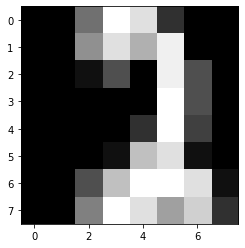

In [239]:
#elige aleatoriamente algún dato y lo visualiza
n = randint(0,N)

plt.imshow(np.reshape(digits[n],(8,8)), cmap='gray')

print(labs[n])
print(np.reshape(digits[n],(8,8)))
plt.show()

## Separacion de los datos manuscritos con los datos de 1 y 9


In [240]:
d1 = 1
d2 = 9
ind_d1 = labs == d1
ind_d2 = labs == d2
dig1 = digits[ind_d1]
dig2 = digits[ind_d2]
X = np.vstack((dig1,dig2)) #en esta matriz están los datos seleccionados
lab1 = labs[ind_d1]
lab2 = labs[ind_d2]
nlabs = np.concatenate((lab1,lab2))

1
[[ 0.  0.  0.  0. 14.  7.  0.  0.]
 [ 0.  0.  0. 13. 16.  9.  0.  0.]
 [ 0.  0. 10. 16. 16.  7.  0.  0.]
 [ 0.  7. 16.  8. 16.  2.  0.  0.]
 [ 0.  1.  5.  6. 16.  6.  0.  0.]
 [ 0.  0.  0.  4. 16.  6.  0.  0.]
 [ 0.  0.  0.  2. 16.  6.  0.  0.]
 [ 0.  0.  0.  0. 12. 11.  0.  0.]]


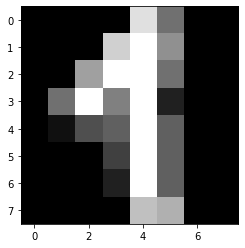

In [241]:
#el primer subconjunto contiene 1's solamente
n1 = randint(0, dig1.shape[0])

print(lab1[n1])

plt.imshow(np.reshape(dig1[n1],(8,8)), cmap='gray')
print(np.reshape(dig1[n1],(8,8)))
plt.show()

9
[[ 0.  0. 11. 10.  0.  0.  0.  0.]
 [ 0.  0. 13. 15.  0.  0.  0.  0.]
 [ 0.  0. 12. 16.  5.  0.  0.  0.]
 [ 0.  1. 15. 16.  5.  0.  0.  0.]
 [ 0.  0.  3. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 10. 14.  0.  0.  0.]
 [ 0.  0.  5. 11. 16.  9.  5.  1.]
 [ 0.  0. 12. 16. 16. 16. 16. 12.]]


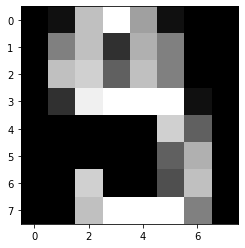

In [242]:
#el segundo subconjunto contiene 9's solamente
n2 = randint(0, dig2.shape[0])

print(lab2[n2])

plt.imshow(np.reshape(dig2[n2],(8,8)), cmap='gray')
print(np.reshape(dig1[n2],(8,8)))
plt.show()

## Realizacion de PCA caso #1

Usar todas la componentes

Modelo 1

In [243]:
pca = PCA(n_components = 64) # usamos todas las dimensiones inicialmente para identificar el total de varianza proyectada
xpca = pca.fit_transform(X)

In [244]:
var_exp = pca.explained_variance_
np.cumsum(var_exp)/sum(var_exp)*100

array([ 31.96830813,  47.80287723,  56.92281122,  62.56829035,
        67.48177928,  71.4454917 ,  74.93223361,  77.88246893,
        80.63263319,  82.91461305,  84.77955187,  86.52505518,
        87.82062034,  89.01190235,  90.10335009,  90.98534339,
        91.7933638 ,  92.56247386,  93.22193481,  93.83651735,
        94.37622597,  94.8875305 ,  95.3781327 ,  95.8116442 ,
        96.18181992,  96.54305904,  96.88780198,  97.18354235,
        97.45972534,  97.7243511 ,  97.98476812,  98.19474211,
        98.39762914,  98.59244562,  98.7611034 ,  98.92029679,
        99.06158336,  99.18642438,  99.29245723,  99.39736253,
        99.48982197,  99.57209467,  99.65215951,  99.72516247,
        99.78735994,  99.84428003,  99.89571924,  99.94302481,
        99.9813025 ,  99.9877524 ,  99.99259676,  99.99577785,
        99.99804657,  99.99906495, 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.  

### Entrenamiento y validacion

In [245]:
X_train, X_test, y_train, y_test = train_test_split(xpca, nlabs, test_size=0.2)
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

pred = xgb_classifier.predict(X_test)
scores = cross_val_score(xgb_classifier, xpca, nlabs, cv=5)
print("Accuracy: {:.4f}%".format(np.mean(scores) * 100, np.std(scores) * 100))

Accuracy: 96.1339%


### Resultados bidemincionales

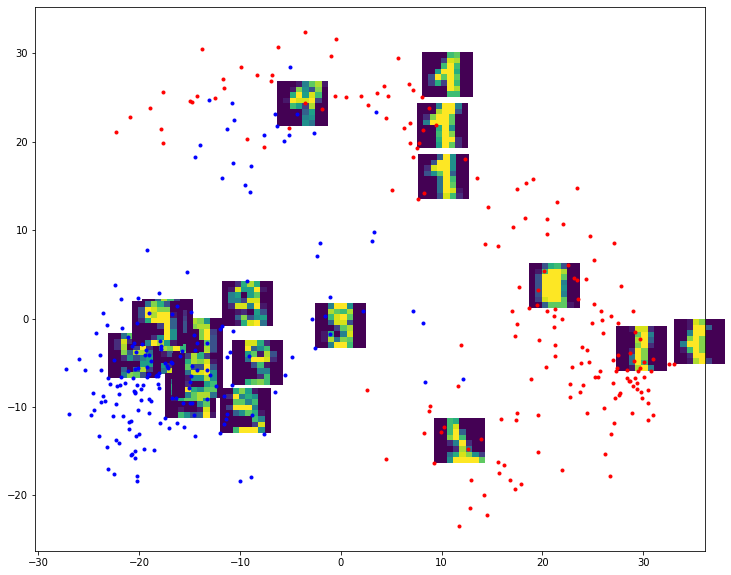

In [246]:
dat_proy = pca.transform(X)
ind1 = nlabs == d1
ind2 = nlabs == d2

dig1_proy = dat_proy[ind1]
dig2_proy = dat_proy[ind2]

#grafica las proyecciones de cada dato
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)

plt.plot(dig1_proy[:,0],dig1_proy[:,1],'r.')
plt.plot(dig2_proy[:,0],dig2_proy[:,1],'b.')

#selecciona aleatoriamente algunos datos y despliega sus imágenes

[N,d] = dat_proy.shape
for i in range(20):
    n = randint(0,N-1)
    x = dat_proy[n,0]
    y = dat_proy[n,1]
    bb = Bbox.from_bounds(x,y,5,5)  
    bb2 = TransformedBbox(bb,ax.transData)
    bbox_image = BboxImage(bb2, norm = None, origin=None, clip_on=False)
    im = np.reshape(X[n,],(8,8))
    bbox_image.set_data(im)
    ax.add_artist(bbox_image)
plt.show()

## Caso #2 

Preservacion del 80% de varianza.

Modelo 2

In [247]:
pca = PCA(n_components = 0.8) # proyectamos sobre el espacio definido por las primeras 9 componentes principales
xpca = pca.fit_transform(X)

In [248]:
var_exp = pca.explained_variance_
np.cumsum(var_exp)/sum(var_exp)*100

array([ 39.64686115,  59.28477756,  70.59525277,  77.59673457,
        83.69040748,  88.60617454,  92.93040626,  96.58926647,
       100.        ])

### Entrenamiento y validacion

In [249]:
X_train, X_test, y_train, y_test = train_test_split(xpca, nlabs, test_size=0.2)
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

pred = xgb_classifier.predict(X_test)
scores = cross_val_score(xgb_classifier, xpca, nlabs, cv=5)
print("Accuracy: {:.4f}%".format(np.mean(scores) * 100, np.std(scores) * 100))

Accuracy: 96.1301%


### Visualizacion bidimencional de los resultados


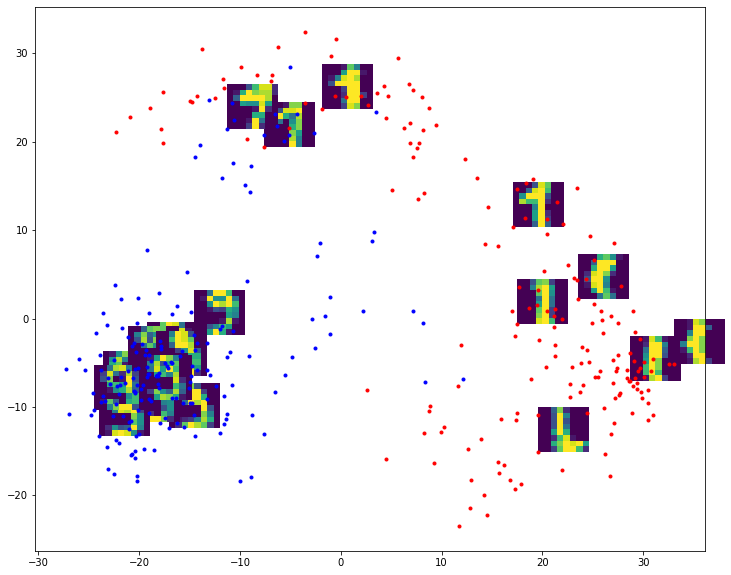

In [250]:
ind1 = nlabs == d1
ind2 = nlabs == d2

dig1_proy = dat_proy[ind1]
dig2_proy = dat_proy[ind2]

#grafica las proyecciones de cada dato
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)

plt.plot(dig1_proy[:,0],dig1_proy[:,1],'r.')
plt.plot(dig2_proy[:,0],dig2_proy[:,1],'b.')

#selecciona aleatoriamente algunos datos y despliega sus imágenes

[N,d] = dat_proy.shape
for i in range(20):
    n = randint(0,N-1)
    x = dat_proy[n,0]
    y = dat_proy[n,1]
    bb = Bbox.from_bounds(x,y,5,5)  
    bb2 = TransformedBbox(bb,ax.transData)
    bbox_image = BboxImage(bb2, norm = None, origin=None, clip_on=False)
    im = np.reshape(X[n,],(8,8))
    bbox_image.set_data(im)
    ax.add_artist(bbox_image)
plt.show()

## Caso #3 

Emplear solo dos componentes.

Modelo 3

In [251]:
pca = PCA(n_components = 2) # proyectamos sobre el espacio definido por las primeras 9 componentes principales
xpca = pca.fit_transform(X)

In [252]:
var_exp = pca.explained_variance_
np.cumsum(var_exp)/sum(var_exp)*100

array([ 66.87528028, 100.        ])

### Entrenamiento y validacion

In [253]:
X_train, X_test, y_train, y_test = train_test_split(xpca, nlabs, test_size=0.2)
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

pred = xgb_classifier.predict(X_test)
scores = cross_val_score(xgb_classifier, xpca, nlabs, cv=5)
print("Accuracy: {:.4f}%".format(np.mean(scores) * 100, np.std(scores) * 100))

Accuracy: 91.4155%


### Visualizacion bidimencional de los resultados

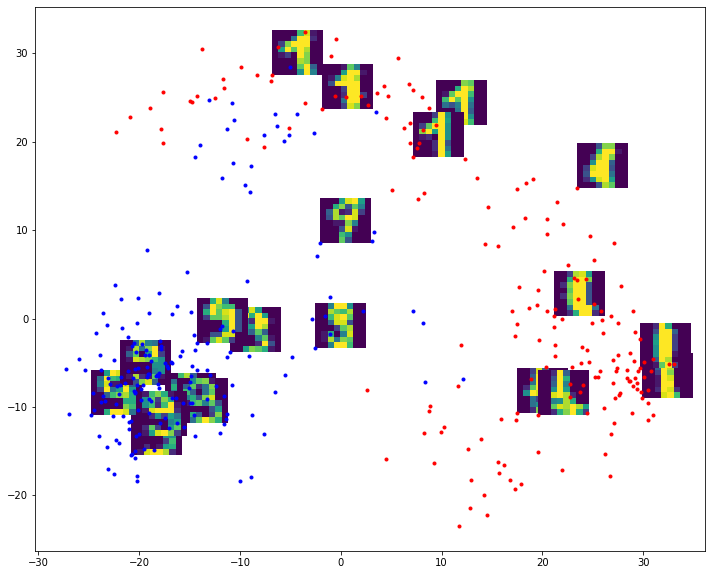

In [254]:
dat_proy = pca.transform(X)
ind1 = nlabs == d1
ind2 = nlabs == d2

dig1_proy = dat_proy[ind1]
dig2_proy = dat_proy[ind2]

#grafica las proyecciones de cada dato
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)

plt.plot(dig1_proy[:,0],dig1_proy[:,1],'r.')
plt.plot(dig2_proy[:,0],dig2_proy[:,1],'b.')

#selecciona aleatoriamente algunos datos y despliega sus imágenes

[N,d] = dat_proy.shape
for i in range(20):
    n = randint(0,N-1)
    x = dat_proy[n,0]
    y = dat_proy[n,1]
    bb = Bbox.from_bounds(x,y,5,5)  
    bb2 = TransformedBbox(bb,ax.transData)
    bbox_image = BboxImage(bb2, norm = None, origin=None, clip_on=False)
    im = np.reshape(X[n,],(8,8))
    bbox_image.set_data(im)
    ax.add_artist(bbox_image)
plt.show()

## Conclusion 

En conclusion dada el Accuracy:

Caso #1 con todos los componentes:  **Accuracy: 96.1339%**

Caso #2 con 80% de la varianza:  **Accuracy: 96.1301%**

Caso #3 con 2 componentes:  **Accuracy: 91.4155%**

Podemos observar que en todos los casos el que tiene mayor presicion es el caso 1 por lo tanto este seria el modelo a seleccionar.